# **Panorama da COVID-19 no Brasil e no Mundo**

No dia 31 de dezembro de 2019, a Organização Mundial da Saúde (OMS) tomou conhecimento a respeito da COVID-19, após receber a notificação de um grupo de casos de "pneumonia viral" em Wuhan, na républica Popular da China.Tratava-se então de um doença infecciosa causada pelo coronavírus SARS-CoV-2 que tem como principais sintomas febre, cansaço e tosse seca. Além desses, há também os menos comuns, mais que podem afetar alguns pacientes, como por exemplo: perda de paladar ou olfato, congestão nasal, conjuntivite, dor de garganta, dor de cabeça, dores nos músculos ou juntas, diferentes tipos de erupção cutânea, náusea ou vômito, diarreia, calafrios ou tonturas.

<center><img alt="Colaboratory logo" width="60%" src="https://img.freepik.com/vetores-gratis/fundo-de-doenca-pandemica-de-surto-global-de-coronavirus-covid-19_1017-24327.jpg?w=1380&t=st=1683238721~exp=1683239321~hmac=91bad34179b6e4dcb130a9d92c63307ac33065eae969ee68343207a575a3ffc1"></center>


Vale a pena mencionar, que sua principal forma de transmissão é por meio de partículas provenientes de tosses ou espirros de pessoas infectadas e sua gravidade varia de pessoa para pessoa. Essa variação na intensidade com que atingiu a população inicialmente, tornou-se possível observar vários guadros clinícos, desde de sintomas leves ou assintomáticos até a necessidade de ventilação forçada e balão de oxigênio.
Considerada a 6° emergência de saúde pública de importância internacional declarada, segundo a Organização Pan-Americana de Saúde, a pandemia da COVID-19 causou milhares mortes e sequelas em todo globo.
Diante de tudo isso, e com o objetivo de elevar a consciência situcional no Brasil e no mundo, a seguir será realizada uma análise sobre os dados públicos da doença.                                                     

**Neste notebook ,primeiramente, será analisado os dados da Covid-19 no Brasil e no Mundo. Posteriormente,de forma mais profunda, será realizada uma exploração dos números da doença para as 5 regiões do Brasil. Vale a pena destacar, que os dados serão importados ,de maneira respectiva, dos seguintes sites:[Our World in Data](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-01..latest&facet=none&country=USA~GBR~CAN~DEU~ITA~IND&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Color+by+test+positivity=false) e [Ministério da Saúde](https://covid.saude.gov.br/)**

<center><img alt="Covid-19" width="5%" src="https://avatars.githubusercontent.com/u/14187135?s=280&v=4"></center> 

<center>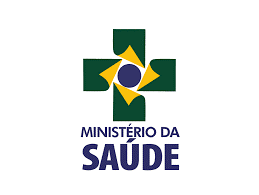</center>



##**Obtenção do Dados**

In [ ]:
# Importando os pacotes de bibliotecas necessárias

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from datetime import date
import glob
from google.colab import files

import numpy as np
import math

sns.set_style()
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

##**Análise dos Dados**

###Dicionário de Variáveis
De acordo com o Our World Data eles dividem os casos em categorias de: casos confirmados, mortes, mortes acumuladas, hospitalizações, políticas públicas realizadas, taxa de reprodução do vírus, testes de detecção, vacinação e outros.

Variáveis sobre os casos confirmados:

* ``total_cases`` - Total de casos confirmados. Nestes dados podem estar incluídos casos suspeitos que foram reportados.
* ``new_cases`` - Numéro de novos casos.
* ``new_cases_smoothed`` - Número de novos casos (suavizados em 7 dias).
* ``total_cases_per_million`` - Total de casos confirmados por milhão de habitantes.
* ``new_cases_per_million`` - Novos casos por milhão de habitantes.
* ``new_cases_smoothed_per_million`` - Novos casos por milhão de habitantes (suavizados em 7 dias)

Variáveis relacionadas ao número de mortes:

* ``total_deaths`` - Total de mortes pela COVID-19.
* ``new_deaths`` - Novas mortes atribuídas a COVID-19
* ``new_deaths_smoothed`` - Novas mortes atribuídas a COVID-19 (suavizados em 7 dias)
* ``total_deaths_per_million`` - Total de mortes atribuída a COVID-19 por milhão de habitantes.
* ``new_deaths_per_million`` - Novas mortes atribuídas a COVID-19 por milhão de habitantes.
* ``new_deaths_smoothed_per_million`` - Novas mortes atribuídas a COVID-19 (suavizados em 7 dias) por milhão de habitantes.

Mortalidade de excesso:

* ``excess_mortality`` - Diferença em percentual do número de mortes reportados semanalmente ou mensalmente no período de 2020 - 2021 e o número de mortes projetados para o mesmo período baseados no ano anterior.
* ``excess_mortality_cumulative`` - Diferença em percentual do número de mortes desde 1 de janeiro de 2020 e o número acumulado de mortes projetadas para o mesmo período baseados no ano anterior.
* ``excess_mortality_cumulative_absolute`` - Diferença acumulado entre o número de mortes reportados desde 1 de janeiro de 2020 e o número acumulado de mortes projetados para o mesmo período baseados no ano anterior.
* ``excess_mortality_cumulative_per_million`` - Diferença acumulado entre o número de mortes reportados desde 1 de janeiro de 2020 e o número acumulado de mortes projetados para o mesmo período baseados no ano anterior por milhão de habitantes.

Hospitalizações:

* ``icu_patients`` - Número de pacientes em unidades de tratamentos intensivas (UTIs) para o dia determinado.
* ``icu_patients_per_million`` - Número de pacientes em UTIs para o dia determinado por milhão de habitantes.
* ``hosp_patients`` - Número de pacientes hospitalizados com COVID-19 para o determinado dia.
* ``hosp_patients_per_milliom`` - Número de pacientes hospitalizados com COVID-19 para o determinado dia por milhão de habitantes.
* ``weekly_icu_admissions`` - Número de pacientes com COVID-19 recém admitidos em UTIs na determinada semana (a data de notificação é de 6 dias antes)
* ``weekly_icu_admissions_per_million`` - Número de pacientes com COVID-19 recém admitidos em UTIs na determinada semana (a data de notificação é de 6 dias antes) por milhão de habitantes.
* ``weekly_hosp_admissions`` - Número de pacientes com COVID-19 recém admitidos em hospitais em uma determinada semana.
* ``weekly_hosp_admissions_per_million`` - Número de pacientes com COVID-19 recém admitidos em hospitais em uma determinada semana por milhão de habitantes.

Políticas adotadas:

* ``strigency_index`` - Índice de rigidez de resposta do governo: esta medida é composta por 9 indicadores de resposta, em que inclui fechamento de escolas, fechamento de locais de trabalho e proibição de viagens. O valor tem escala de 0 a 100 (para 100 a resposta mais rígida).

Taxa de reprodução do vírus:

* ``reproduction_rate`` - estimativa em tempo real da taxa de reprodução da COVID-19.

Testes de Covid:

Em junho de 2022 foi encerrada a atualização de dados para esta variável.
Vacinação:

* ``total_vaccinations`` - Total de doses de vacinação contra COVID-19 administradas.
* ``people_vaccinated`` - Número total de pessoas que receberam pelo menos uma dose da vacina.
* ``people_fully_vaccvinated`` - Número total de pessoas que receberam todas as doses disponíveis da vacina.
* ``total_boosters`` - Número total de doses de reforço administradas.
* ``new_vaccinations`` - Novas doses de vacinação contra COVID-19 administradas.
* ``new_vaccinations_smoothed`` - Novas doses de COVID-19 administradas (suavizadas por 7 dias). Nos países que não relatam os dados diários de vacinação, assume-se que a vacinação ocorreu igualmente em todos os períodos em que nenhum dado foi relatado. Assim é feito uma série completa de números diários que são calculados em um intervalo contínuo de 7 dias.
* ``total_vaccinations_per_hundred`` - Número total de doses de vacinação para COVID-19 administradas por 100 habitantes.
* ``people_vaccinated_per_hundred``- Número total de pessoas que se vacinarem com pelo menos uma dose de vacina por 100 habitantes.
* ``people_fully_vaccinated_per_hundred`` - Número total de pessoas com vacinação completa de doses disponíveis por 100 habitantes.
* ``total_boosters_per_hundred`` - Número total de doses reforço administradas por 100 habitantes.
* ``new_vaccinations_smoothed_per_million`` - Novas doses de vacinas para COVID-19 administradas (suavizados em 7 dias) por 100 habitantes.
* ``new_people_vaccinated_smoothed`` - Número diário de pessoas que recebem a primeira dose da vacina (suavizados em 7 dias)
* ``new_people_vaccinated_smoothed_per_hundred`` - Número diário de pessoas que recebem a primeira dose da vacina (suavizadao em 7 dias) por 100 habitantes.

Outras variáveis:

* ``iso_code`` - ISO 3166-1 alpha-3 códigos de país de três letras. Observe que as regiões definidas pelo OWID (por exemplo, continentes como 'Europa') contém o prefixo 'OWID'.
* ``continent`` - Continente da localização geográfica
* ``location ``- Localização geográfica. A localização 'Internacional' considera regiões especiais (cruzeiros "Diamond Princess" e "MS Zaandam").
* ``date``- Data da observação
* ``population`` - População.
* ``population_density`` - Número de pessoas dividido por área de terra, medido em quilômetros quadrados, ano mais recente disponível.
* ``median_age`` - Idade média da população, projeção da ONU para 2020
* ``age_65_older`` - Parcela da população com 65 anos ou mais, ano mais recente disponível
* ``age_70_older`` - Parcela da população com 70 anos ou mais em 2015
* ``gdp_per_capita`` - Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011), ano mais recente disponível
* ``extreme_poverty`` - Percentual da população que vive em extrema pobreza, ano mais recente disponível desde 2010
* cardiovasc_death_rate - Taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100.000 pessoas)
* diabetes_prevalence - Prevalência de diabetes (% da população de 20 a 79 anos) em 2017

* ``female_smokers`` - Proporção de mulheres que fumam, ano mais recente disponível
* ``male_smokers`` - Proporção de homens que fumam, ano mais recente disponível
* ``handwashing_facilities`` - Proporção da população com instalações básicas de lavagem das mãos nas instalações, ano mais recente disponível
* ``hospital_beds_per_thousand`` - Camas hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010
* ``life_expectancy`` - Expectativa de vida ao nascer em 2019
* ``human_development_index ``- Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano – uma vida longa e saudável, conhecimento e um padrão de vida decente.

### Importação, Cópia e Dimensões:

Inicialmente, foi feito a importação do arquivo com os dados da Covid-19 da Our World in Data, disponibilizado no Github, para um DataFrame. Em seguida, foi realizado uma cópia e verificado suas dimensões.

In [ ]:
# Importando o arquivo
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data-old.csv")

In [ ]:
# Realizando uma cópia do DataFrame
df_mod = df.copy()

In [ ]:
# Verificando as Dimensões do DataFrame
print('Dimensões do Dataset','\nVariáveis:  ',df_mod.shape[1], "\n"'Entradas:  ', df_mod.shape[0])
df_mod.head()

Dimensões do Dataset 
Variáveis:   67 
Entradas:   262423


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


###Atributos, Tipos de Variáveis e Valores Ausentes
Nesse momento, foi visto todos os atributos (variáveis) do dataset com seus respectivos nomes, assim como o tipo de cada um deles. Além disso, listou-se seus valores ausentes em ordem decrescente.

In [ ]:
# Verificando todos os nomes de variáveis do DataFrame
df_mod.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
# Verificando o tipo de cada atributo (variável) no dataset
df_mod.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [ ]:
# Listando em ordem decrescente as variáveis por seus valores ausentes
round((df_mod.isnull().sum() / df_mod.shape[0]*100).sort_values(ascending=False),2)

weekly_icu_admissions                      96.66
weekly_icu_admissions_per_million          96.66
excess_mortality_cumulative_per_million    96.64
excess_mortality                           96.64
excess_mortality_cumulative                96.64
                                           ...  
total_cases                                 5.54
population                                  0.43
date                                        0.00
location                                    0.00
iso_code                                    0.00
Length: 67, dtype: float64

###Modificando o Tipo de Atributo Data e Excluindo os Desnecessários
Após análise anterior, decidiu-se realizar as seguintes etapas:

* Transfomar o tipo do atributo **data** de ``object`` para ``datetime64[ns]``, com o intuito de possibilitar o trabalho com datas posteriormente.

* Excluir os atributos considerados descenessários com alto grau de valores nulos.

In [ ]:
# Colocando o atributo data para datetime
df_mod.date = pd.to_datetime(df_mod.date)

In [ ]:
# Exluindo os atributos desnecessários com alto grau de valores nulos.
df_mod.drop(["excess_mortality_cumulative_per_million","excess_mortality","excess_mortality_cumulative","excess_mortality_cumulative_absolute","weekly_icu_admissions","excess_mortality_cumulative_per_million"], axis=1, inplace=True)

### Excluindo as localidades que não farão parte dessa análise no momento

Nessa etapa, foi deletada todas as localidades tidas como não essenciais para o estudo em questão. Sendo visualizado ,posteriormente, o novo DataFrame após a exclusão.

In [ ]:
# Colocando todas as localidades que não serão consideradas ,nesse momento, dentro de uma lista chamada "aux"
aux = ["OWID_WRL","OWID_INT","OWID_AFR","OWID_ASI","OWID_EUR","OWID_OCE","OWID_SAM","OWID_NAM","OWID_EUN",
       "OWID_LIC","OWID_LMC","OWID_HIC","OWID_UMC","OWID_CYN","OWID_KOS"]

In [ ]:
# Excluindo as localidades dentro da lista "aux", das restantes.
df_mod.drop(df.index[df.iso_code.isin(aux)], axis = 0, inplace = True )

In [ ]:
# Visualizando o DataFrame ápos a exclusão
df_mod.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0


### Verificando a Primeira e Última data do DataFrame

Aqui foi veridicado a data inicial do primeiro e do último dado.

In [ ]:
# Verificando a primeira data do DataFrame
print("Data mais antiga do Data Frame: {}".format(df_mod.date.min()))

Data mais antiga do Data Frame: 2020-01-01 00:00:00


In [ ]:
# Verificando a última data do DataFrame
print("Data mais recente do Data Frame: {}".format(df_mod.date.max()))

Data mais recente do Data Frame: 2023-03-07 00:00:00


### Top 5 Países (Casos de Covid-19 no Mundo)
Localizando os 5 Países com Maior Número de Casos de Covid-19. 

In [ ]:
#Total de casos até a data mais recente do Dataset

df_mod.loc[df_mod.date =='2023-03-07'].sort_values(by="total_cases", ascending=False)[:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
247815,USA,North America,United States,2023-03-07,103680242.0,24585.0,34448.429,1122599.0,335.0,371.000,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,3.382899e+08
107866,IND,Asia,India,2023-03-07,44689919.0,326.0,297.429,530775.0,0.0,0.429,...,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1.417173e+09
83206,FRA,Europe,France,2023-03-07,39689456.0,7063.0,3874.857,165166.0,24.0,19.143,...,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,6.781300e+07
88713,DEU,Europe,Germany,2023-03-07,38231610.0,20759.0,8957.429,168709.0,312.0,89.000,...,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,0.947,8.336984e+07
33052,BRA,South America,Brazil,2023-03-07,37076053.0,NaN,NaN,699276.0,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,2.153135e+08


#### Plotando o Gráfico com os 5 Países com o Maior Número de Casos de COVID-19

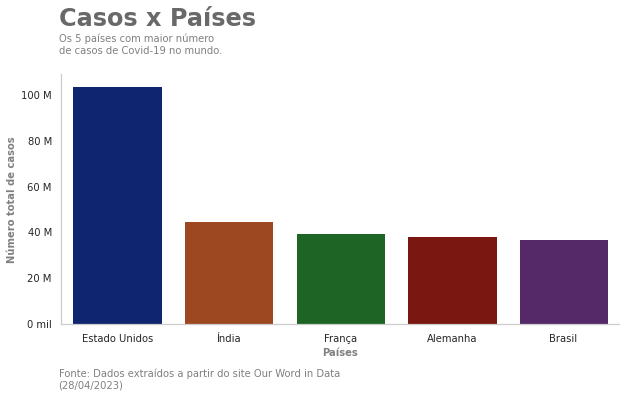

In [ ]:
# Plotando o gráfico dos 5 países com o maior número de casos de Covid-19
df_top5 = df_mod.loc[df_mod.date == '2023-03-07', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:5]

#definindo a figura
fig , ax = plt.subplots(figsize=(10,4.5), dpi=72)
sns.barplot(data = df_top5, x="location", y = "total_cases", palette = "dark")

# título
ax.text(-0.525,130000000, "Casos x Países", fontsize=24, color="dimgray", fontweight ="bold")

#subtítulo
ax.text(-0.525,118000000, "Os 5 países com maior número\nde casos de Covid-19 no mundo.", fontsize=10, color="gray")

#nome dos eixos
plt.xlabel('Países', fontsize = 10, color="gray", fontweight="bold" )
plt.ylabel('Número total de casos', fontsize = 10, color="gray", fontweight="bold")

# configurar xticks
p=["Estado Unidos", "Índia", "França", "Alemanha","Brasil"]
ax.set_xticklabels(labels=p, fontsize=10)

# configurar yticks
ax.set_yticks(ticks = range(0,120000000, 20000000),labels = ['0 mil', '20 M', '40 M', '60 M', '80 M','100 M'], fontsize = 10)

#rodapé
ax.text(-0.525, -28000000, "Fonte: Dados extraídos a partir do site Our Word in Data\n(28/04/2023)" ,fontsize=10, color= "gray")

plt.grid(visible= False)
sns.despine()
plt.show()

### Top 5 Países (Obitos de Covid-19 no Mundo)
Localizando os 5 Países com Maior Número de Obitos de Covid-19. 

In [ ]:
# Total de obitos até a data mais recente do Dataset
df_mod.loc[df_mod.date == '2023-03-07'].sort_values(by="total_deaths", ascending=False)[:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
247815,USA,North America,United States,2023-03-07,103680242.0,24585.0,34448.429,1122599.0,335.0,371.000,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,3.382899e+08
33052,BRA,South America,Brazil,2023-03-07,37076053.0,NaN,NaN,699276.0,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,2.153135e+08
107866,IND,Asia,India,2023-03-07,44689919.0,326.0,297.429,530775.0,0.0,0.429,...,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,1.417173e+09
194635,RUS,Europe,Russia,2023-03-07,22051220.0,10345.0,12928.714,388396.0,41.0,38.571,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1.447133e+08
151022,MEX,North America,Mexico,2023-03-07,7475219.0,4566.0,3398.571,333136.0,36.0,21.143,...,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,1.275041e+08


#### Plotando o Gráfico com os 5 Países com o Maior Número de Obitos de COVID-19

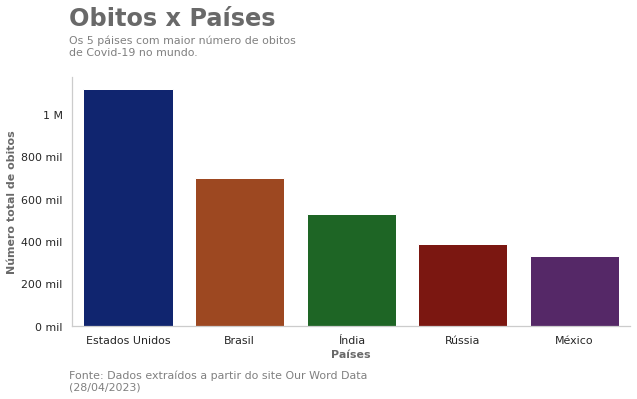

In [ ]:
# Plotando o gráfico dos 5 países com o maior número de obitos de Covid-19
df_top5 = df_mod.loc[df_mod.date == '2023-03-07', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:5]

#definindo a figura
fig, ax = plt.subplots(figsize=(10,4.5), dpi = 72)
sns.barplot(data = df_top5, x="location", y = "total_deaths", palette = "dark")

# título
ax.text(-0.525, 1420000, "Obitos x Países", fontsize=24, color= "dimgray", fontweight="bold")

#subtítulo
ax.text(-0.525, 1280000, "Os 5 páises com maior número de obitos\nde Covid-19 no mundo.",fontsize=11, color= "gray")

#rodapé
ax.text(-0.525, -300000, "Fonte: Dados extraídos a partir do site Our Word Data\n(28/04/2023)" ,fontsize=11, color= "gray")

#nome dos eixos
plt.xlabel('Países', fontsize = 11, color="dimgray", fontweight="bold" )
plt.ylabel('Número total de obitos', fontsize = 11, color="dimgray", fontweight="bold" )

# configurar xticks
x = ["Estados Unidos", "Brasil", "Índia", "Rússia", "México"] 
ax.set_xticklabels(labels= x)
# configurar yticks 
y = ['0 mil', '200 mil', '400 mil', '600 mil', '800 mil','1 M']
ax.set_yticklabels(labels= y)


plt.grid(visible= False)
sns.despine()
plt.show()

### Dados do Brasil - Our Word in Data
Localizando e explorando os dados ,apenas do Brasil, dentro do DataFrame.

In [ ]:
# Mostrando os 5 Primeiros dados.
df_br = df_mod.loc[df_mod.location == "Brazil"].copy()
df_br.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
31947,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
31948,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
31949,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
31950,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
31951,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0


#### Identificando a datas inicial e final do DataFrame

In [ ]:
# Primeira data do DataFrame
data_inicial = df_br.date.min()
print(" A Data Inicial do DataFrame Brasil é {}:".format(data_inicial))

 A Data Inicial do DataFrame Brasil é 2020-02-26 00:00:00:


In [ ]:
# Última data do DataFrame
data_final = df_br.date.max()
print(" A Data Final do DataFrame Brasil é {}:".format(data_final))

 A Data Final do DataFrame Brasil é 2023-03-07 00:00:00:


#### Localizando quando foi o primeiro obito e caso de Covid-19 no Brasil e quantos dias foi o intervalo entre eles.

In [ ]:
# Localizando o primeiro obito 
df_br.loc[df_br["new_deaths"] == 1.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
31967,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0


In [ ]:
print("O primeito obito foi resgistrado em: {}".format(df_br.date.loc[31967]))

O primeito obito foi resgistrado em: 2020-03-17 00:00:00


In [ ]:
# Localizando o primeiro caso
df_br.loc[df_br['new_cases'] ==1.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
31947,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0


In [ ]:
print("O primeiro caso foi resgistrado em: {}".format(df_br.date.loc[31947]))

O primeiro caso foi resgistrado em: 2020-02-26 00:00:00


In [ ]:
# Intervalo de dias entre o primeiro obito e o primeito caso
delta = df_br.date.loc[31967] - df_br.date.loc[31947] 
print(" Passaram {} dias entre o primeiro caso e a primeira morte Covid no Brasil".format(delta.days))

 Passaram 20 dias entre o primeiro caso e a primeira morte Covid no Brasil


#### Plotando os gráficos : 
* 1 - Número de Casos no Brasil ao longo do tempo.
* 2 - Número de Obitos no Brasil ao longo do tempo 

In [ ]:
df_br.loc[df_br["date"] == "2022-01"].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
32622,BRA,South America,Brazil,2022-01-01,22295621.0,3782.0,8189.143,619367.0,33.0,97.286,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0


In [ ]:
df_br.loc[df_br["date"] == "2022-03"].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
32681,BRA,South America,Brazil,2022-03-01,28818850.0,22279.0,65271.286,649922.0,246.0,598.143,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0


In [ ]:
t1 = df_br.date.loc[32622]
t2 = df_br.date.loc[32681] 

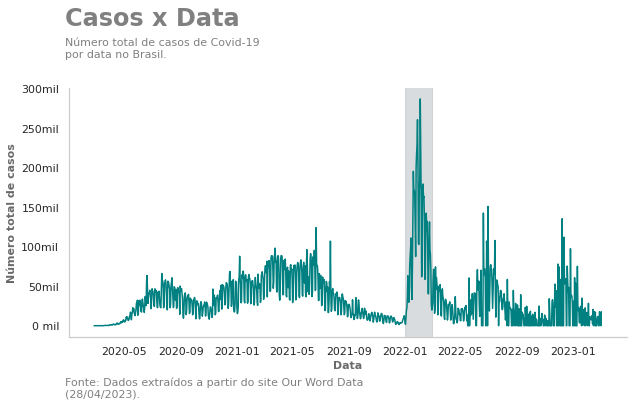

In [ ]:
date_col = pd.DatetimeIndex(df_br["date"])

d1= df_br["new_cases"]

fig, ax = plt.subplots(figsize=(10,4.5), dpi=72)
sns.lineplot(data = df_br, x=date_col, y = d1, color = "teal")



#título
ax.text(18255,380000,"Casos x Data", fontsize=24, color="gray", fontweight="bold")

#subtítulo
ax.text(18255,340000,"Número total de casos de Covid-19\npor data no Brasil.", fontsize=11, color="gray")

#rodapé
ax.text(18255, -90000, "Fonte: Dados extraídos a partir do site Our Word Data\n(28/04/2023).", fontsize=11, color="gray")

#nomes dos eixos
plt.xlabel("Data", fontsize=11, color="dimgray",fontweight="bold")
plt.ylabel("Número total de casos", fontsize=11, color="dimgray",fontweight="bold")

#configuração yticks
plt.yticks(ticks = range(0,350000, 50000),labels = ['0 mil', '50mil', '100mil', '150mil', '200mil','250mil', '300mil'])

#sombra de destaque
plt.axvspan(xmin=t1, xmax=t2, ymin=300000, ymax=0, color="#B4BBBE", alpha=0.5)


plt.grid(visible=False)
sns.despine()
plt.show()




In [ ]:
df_br.loc[df_br["date"] == "2021-02-25"].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
32312,BRA,South America,Brazil,2021-02-25,10402913.0,68279.0,51872.714,251811.0,1575.0,1151.286,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0


In [ ]:
df_br.loc[df_br["date"] == "2021-05-20"].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
32396,BRA,South America,Brazil,2021-05-20,15910762.0,83387.0,65268.857,444647.0,2511.0,1970.857,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0


In [ ]:
t_1 = df_br.date.loc[32312] 
t_2 = df_br.date.loc[32396]

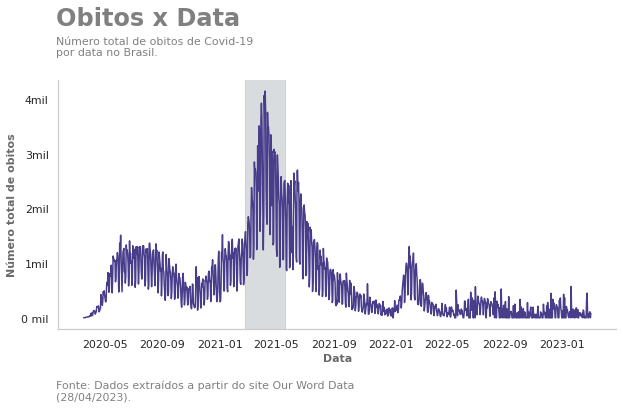

In [ ]:
d2= df_br["new_deaths"]

fig, ax = plt.subplots(figsize=(10,4.5), dpi=72)
sns.lineplot(data = df_br, x=date_col, y = d2, color = "darkslateblue")

#título
ax.text(18280, 5350, "Obitos x Data", fontsize=24, color="gray", fontweight="bold")

#subtítulo
ax.text(18280, 4800, "Número total de obitos de Covid-19\npor data no Brasil.", fontsize=11, color="gray")

#rodapé
ax.text(18280, -1500, "Fonte: Dados extraídos a partir do site Our Word Data\n(28/04/2023).", fontsize=11, color="gray")

#nomes dos eixos
plt.xlabel("Data", fontsize=11, color="dimgray",fontweight="bold")
plt.ylabel('Número total de obitos', fontsize=11, color="dimgray",fontweight="bold")

#configuração yticks
plt.yticks(ticks = range(0,4500, 1000),labels = ['0 mil', '1mil', '2mil', '3mil', '4mil'])

plt.axvspan(xmin=t_1, xmax=t_2, ymin=4000, ymax=0, color="#B4BBBE", alpha=0.5)
plt.grid(visible=False)
sns.despine()
plt.show()

### Realizando o download dos dados exclusivos do Brasil direto no Ministério da Saúde
 Para realizar um estudo mais incisivo no Brasil, assim como nas suas regiões e em alguns estados, foi necessário obter os dados diretamente do Minestério da Saúde. Por isso, foi feito acesso ao site: [https://covid.saude.gov.br/](https://covid.saude.gov.br/) e baixado o arquivo .zip ``HIST_PAINEL_COVIDBR_01abr2023`` contendo 7 arquivos .csv. Em seguida, foi feito o upload desses arquivos para o presente Notebook/Colab, onde foi concatenado em um único arquivo denominado de ``Covid19_Brasil``.

In [ ]:
# arquivos = files.upload()

In [ ]:
# extensao = 'csv'
# arquivos_csv = [i for i in glob.glob('*.{}'.format(extensao))]
# todos_arquivos = pd.concat([pd.read_csv(f, sep=';') for f in arquivos_csv ])

In [ ]:
# todos_arquivos.to_csv('Covid19_Brasil.csv')
# files.download('Covid19_Brasil.csv')

#### Obtenção dos dados

In [ ]:
# Importando o arquivo Covid19_Brasil para um DataFrame
df_BR = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSNP/Projeto_COVID_19/Covid19_Brasil.csv")

In [ ]:
# Mostrando as 5 primeiras linhas
df_BR.head()

,Unnamed: 0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-01,26,210147125.0,18622304.0,65163,520095,2029,16858632.0,1180443.0,NaN
1,1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-02,26,210147125.0,18687469.0,65165,521952,1857,16931272.0,1170937.0,NaN
2,2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-03,26,210147125.0,18742025.0,54556,523587,1635,16989351.0,1176166.0,NaN
3,3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-04,27,210147125.0,18769808.0,27783,524417,830,17033808.0,1184630.0,NaN
4,4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-05,27,210147125.0,18792511.0,22703,525112,695,17082876.0,1162515.0,NaN


#### Mostrando todos os nomes das váriáveis e o tamanho do DataFrame

In [ ]:
# Todas os nomes das colunas
df_BR.columns

Index(['Unnamed: 0', 'regiao', 'estado', 'municipio', 'coduf', 'codmun',
       'codRegiaoSaude', 'nomeRegiaoSaude', 'data', 'semanaEpi',
       'populacaoTCU2019', 'casosAcumulado', 'casosNovos', 'obitosAcumulado',
       'obitosNovos', 'Recuperadosnovos', 'emAcompanhamentoNovos',
       'interior/metropolitana'],
      dtype='object')

In [ ]:
# Dimensão do DataFrame
print(f'Neste dateframe há {df_BR.shape[1]} variáveis e {df_BR.shape[0]} entradas.')

Neste dateframe há 18 variáveis e 6187387 entradas.


#### Passando a variável data de ``object`` para ``datetime`` e verificando a data mais recente do DataFrame

In [ ]:
# Transformando data para o formato datetime
df_BR.data = pd.to_datetime(df_BR.data)

In [ ]:
# Data mais recente do DataFrame
data_max = df_BR.data.max()
print("A data mais recente desse DataFrame é {} :".format(data_max))

A data mais recente desse DataFrame é 2023-04-01 00:00:00 :


#### Localizando os dados do DataFrame para a data mais recente e excluindo dos dados do Brasil todo.

In [ ]:
# Dados para a data mais recente
df_BR_mod = df_BR.loc[df_BR.data == '2023-04-01']

In [ ]:
# Deletando as primeiras linhas que corresponde aos dados do Brasil todo
df_BR_mod = df_BR_mod.iloc[1: , :]

In [ ]:
# Mostrando as 5 primeiras linhas após a modificação
df_BR_mod.head()

,Unnamed: 0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
4102051,181,Norte,RO,NaN,11,NaN,NaN,NaN,2023-04-01,13,1777225.0,483782.0,90,7433,0,NaN,NaN,NaN
4102142,272,Norte,AC,NaN,12,NaN,NaN,NaN,2023-04-01,13,881935.0,161317.0,322,2044,0,NaN,NaN,NaN
4102233,363,Norte,AM,NaN,13,NaN,NaN,NaN,2023-04-01,13,4144597.0,635783.0,174,14466,9,NaN,NaN,NaN
4102324,454,Norte,RR,NaN,14,NaN,NaN,NaN,2023-04-01,13,605761.0,183408.0,363,2191,11,NaN,NaN,NaN
4102415,545,Norte,PA,NaN,15,NaN,NaN,NaN,2023-04-01,13,8602865.0,876526.0,1052,19056,4,NaN,NaN,NaN


#### Exibindo todas as possibilidades de nomes para a da variável ``região``.

In [ ]:
# Exibindo as regiões do Brasil
print(df_BR_mod['regiao'].unique())

['Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']


#### Apresentando o número de ``casos`` para cada região  e realçando esses dados nos gráficos: 
* NºCasos x Região;
* NºCasos x Estados da Região Sudeste.

In [ ]:
# Número de casos para cada região
Norte = df_BR_mod.loc[df_BR_mod["regiao"] == "Norte", "casosAcumulado"].sum()
Nordeste =  df_BR_mod.loc[df_BR_mod["regiao"] == "Nordeste", "casosAcumulado"].sum()
Sudeste =  df_BR_mod.loc[df_BR_mod["regiao"] == "Sudeste", "casosAcumulado"].sum()
Centro_Oeste =  df_BR_mod.loc[df_BR_mod["regiao"] == "Centro-Oeste", "casosAcumulado"].sum()
Sul =  df_BR_mod.loc[df_BR_mod["regiao"] == "Sul", "casosAcumulado"].sum()

print("Número de Casos na região Norte: {}". format(Norte))
print("Número de Casos na região Nordeste: {}". format(Nordeste))
print("Número de Mortes na região Sudeste: {}". format(Sudeste))
print("Número de Mortes na região Centro-Oeste: {}". format(Centro_Oeste))
print("Número de Mortes na região Sul: {}". format(Sul))

Número de Casos na região Norte: 5786900.0
Número de Casos na região Nordeste: 14672698.0
Número de Mortes na região Sudeste: 29711778.0
Número de Mortes na região Centro-Oeste: 8610370.0
Número de Mortes na região Sul: 15856762.0


In [ ]:
# Transformando esses dados em um DataFrame
df_BR_regiao = {"regiao": ["Norte","Nordeste","Sudeste","Centro-Oeste","Sul"], 
                "casosAcumulado": [Norte, Nordeste, Sudeste, Centro_Oeste, Sul]}                                       

df_BR_regiao = pd.DataFrame(df_BR_regiao)
df_BR_regiao = df_BR_regiao.sort_values(by="casosAcumulado", ascending=False)
df_BR_regiao.head()

,regiao,casosAcumulado
2,Sudeste,29711778.0
4,Sul,15856762.0
1,Nordeste,14672698.0
3,Centro-Oeste,8610370.0
0,Norte,5786900.0


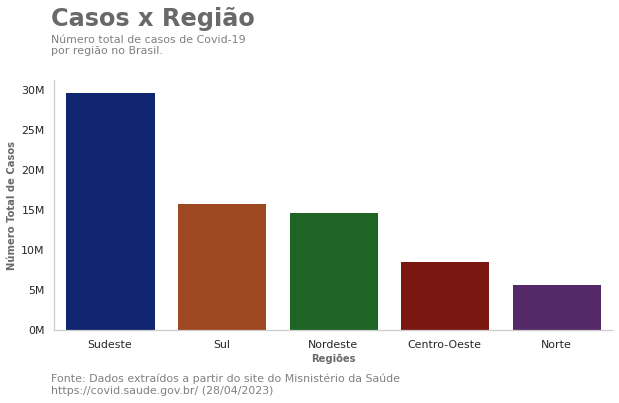

In [ ]:
# Plotando o gráfico dos casos por região 

fig, ax = plt.subplots(figsize=(10,4.5), dpi=72)

sns.set_theme( style="whitegrid",palette = "dark")
sns.barplot(data = df_BR_regiao, x = "regiao", y = "casosAcumulado")

#título
ax.text(-0.525, 38000000, "Casos x Região", fontsize=24, color="dimgray", fontweight="bold")

#subtitulo
ax.text(-0.525, 34500000, "Número total de casos de Covid-19\npor região no Brasil.", fontsize=11, color="gray")

#nome dos eixos
plt.xlabel("Regiões", fontsize=10, color="dimgray", fontweight="bold")
plt.ylabel("Número Total de Casos", fontsize=10, color="dimgray", fontweight="bold")

#configuração yticks
plt.yticks(ticks = range(0, 35000000, 5000000), labels = ["0M","5M","10M","15M","20M","25M","30M"])

#rodapé
ax.text(-0.525, -8000000, "Fonte: Dados extraídos a partir do site do Misnistério da Saúde\nhttps://covid.saude.gov.br/ (28/04/2023)" ,fontsize=11, color= "gray")

sns.despine()
plt.grid(visible=False)
plt.show()

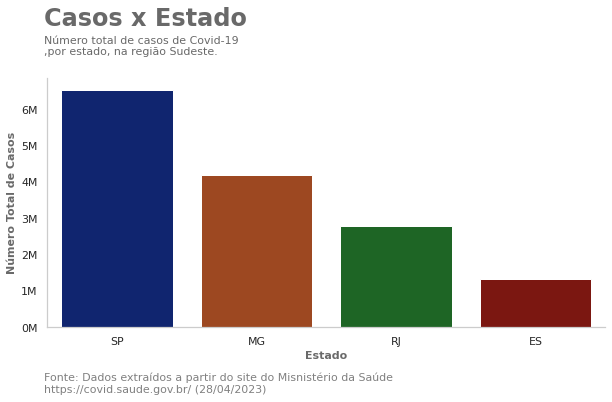

In [ ]:
# Gráfico (número de casos por estado da regiãp sudeste)
df_sudeste = df_BR_mod.loc[df_BR_mod["regiao"] == "Sudeste"].sort_values(by = "casosAcumulado", ascending = False).iloc[:4,]

fig, ax = plt.subplots(figsize = (10,4.5), dpi = 72)
sns.set_theme(style="whitegrid", palette = "dark")
sns.barplot(data = df_sudeste, x = "estado", y = "casosAcumulado")

#título
ax.text(-0.525,8300000,"Casos x Estado", fontsize=24, color="dimgray", fontweight="bold")

#subtítulo
ax.text(-0.525,7500000,"Número total de casos de Covid-19\n,por estado, na região Sudeste.", fontsize=11, color="dimgray")

#nome dos eixos
plt.xlabel("Estado",fontsize=11, color="dimgray", fontweight="bold")
plt.ylabel("Número Total de Casos", fontsize=11, color="dimgray", fontweight="bold")

# configuração ytick
ax.set_yticklabels(labels=["0M","1M","2M","3M","4M","5M","6M"])

#rodapé
ax.text(-0.525, -1800000, "Fonte: Dados extraídos a partir do site do Misnistério da Saúde\nhttps://covid.saude.gov.br/ (28/04/2023)",fontsize=11, color= "gray")

sns.despine()
plt.grid(visible=False, axis="both")
plt.show()

#### Exibindo o número de ``obitos`` para cada região e realçando esses dados nos gráficos:
* NºObitos x Região.
* NºObitos x Estados da Região Sudeste

In [ ]:
# Número de obitos para cada região

Norte_obitos = df_BR_mod.loc[df_BR_mod["regiao"] == "Norte", "obitosAcumulado"].sum()
Nordeste_obitos =  df_BR_mod.loc[df_BR_mod["regiao"] == "Nordeste", "obitosAcumulado"].sum()
Sudeste_obitos =  df_BR_mod.loc[df_BR_mod["regiao"] == "Sudeste", "obitosAcumulado"].sum()
Centro_Oeste_obitos =  df_BR_mod.loc[df_BR_mod["regiao"] == "Centro-Oeste", "obitosAcumulado"].sum()
Sul_obitos =  df_BR_mod.loc[df_BR_mod["regiao"] == "Sul", "obitosAcumulado"].sum()

print("Número de Obitos na região Norte: {}". format(Norte_obitos))
print("Número de Obitos na região Nordeste: {}". format(Nordeste_obitos))
print("Número de Obitos na região Sudeste: {}". format(Sudeste_obitos))
print("Número de Obitos na região Centro-Oeste: {}". format(Centro_Oeste_obitos))
print("Número de Obitos na região Sul: {}". format(Sul_obitos))

Número de Obitos na região Norte: 103188
Número de Obitos na região Nordeste: 269692
Número de Obitos na região Sudeste: 674486
Número de Obitos na região Centro-Oeste: 132146
Número de Obitos na região Sul: 221600


In [ ]:
# Transformando esses dados em um DataFrame

df_BR_regiao_obitos = {"regiao": ["Norte","Nordeste","Sudeste","Centro-Oeste","Sul"], 
                "obitosAcumulado": [Norte_obitos, Nordeste_obitos, Sudeste_obitos, Centro_Oeste_obitos, Sul_obitos]}                                       

df_BR_regiao_obitos = pd.DataFrame(df_BR_regiao_obitos)
df_BR_regiao_obitos = df_BR_regiao_obitos.sort_values(by="obitosAcumulado", ascending=False)
df_BR_regiao_obitos.head()

,regiao,obitosAcumulado
2,Sudeste,674486
1,Nordeste,269692
4,Sul,221600
3,Centro-Oeste,132146
0,Norte,103188


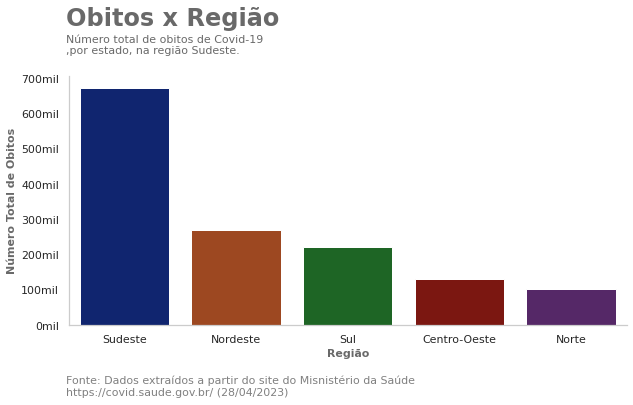

In [ ]:
# Plotando o gráfico dos obitos por região 

fig, ax =plt.subplots(figsize=(10,4.5), dpi=72)
sns.set_theme( style="whitegrid",palette = "dark")
sns.barplot(data = df_BR_regiao_obitos , x = "regiao", y ="obitosAcumulado")

#título
ax.text(-0.525,850000,"Obitos x Região", fontsize=24, color="dimgray", fontweight="bold")

#subtítulo
ax.text(-0.525,770000,"Número total de obitos de Covid-19\n,por estado, na região Sudeste.", fontsize=11, color="dimgray")

#rodapé
ax.text(-0.525,-200000,"Fonte: Dados extraídos a partir do site do Misnistério da Saúde\nhttps://covid.saude.gov.br/ (28/04/2023)" ,fontsize=11, color= "gray")

#configuração yticks
plt.yticks(ticks = range(0, 800000, 100000), labels= ["0mil", "100mil","200mil","300mil","400mil", "500mil","600mil","700mil"])

#nome dos eixos
plt.xlabel("Região", fontsize=11, color="dimgray", fontweight="bold")
plt.ylabel("Número Total de Obitos",fontsize=11, color="dimgray", fontweight="bold")

sns.despine()
plt.grid(visible=False)
plt.show()

In [ ]:
# Plotando o gráfico dos obitos por estado (região Sudeste)
df_obitos_estado_sudeste = df_BR_regiao_obitos.loc[df_BR_regiao_obitos["regiao"] == "Sudeste"].sort_values(by = "obitosAcumulado", ascending = False).iloc[:4,]


SP_obitos = df_BR_mod.loc[df_BR_mod ["estado"] == "SP", "obitosAcumulado"].sum()
RJ_obitos = df_BR_mod.loc[df_BR_mod ["estado"] == "RJ", "obitosAcumulado"].sum()
MG_obitos =  df_BR_mod.loc[df_BR_mod ["estado"] == "MG", "obitosAcumulado"].sum()
ES_obitos =  df_BR_mod.loc[df_BR_mod["estado"] == "ES", "obitosAcumulado"].sum()


print("Número de Obitos no estado de SP: {}". format(SP_obitos))
print("Número de Obitos no estado do RJ:: {}". format(RJ_obitos))
print("Número de Obitos no estado de MG:: {}". format(MG_obitos))
print("Número de Obitos no estado de ES: {}". format(ES_obitos))


Número de Obitos no estado de SP: 359104
Número de Obitos no estado do RJ:: 154088
Número de Obitos no estado de MG:: 131184
Número de Obitos no estado de ES: 30110


In [ ]:
df_estados = {"Estados": ["São Paulo", "Rio de Janeiro","Minas Gerais","Espiríto Santo"],
              "Obitos_Acumulados": [359104,154088,131184,30110]}

df_estados = pd.DataFrame(df_estados)

df_estados = df_estados.sort_values(by="Obitos_Acumulados", ascending=False)
df_estados.head()


,Estados,Obitos_Acumulados
0,São Paulo,359104
1,Rio de Janeiro,154088
2,Minas Gerais,131184
3,Espiríto Santo,30110


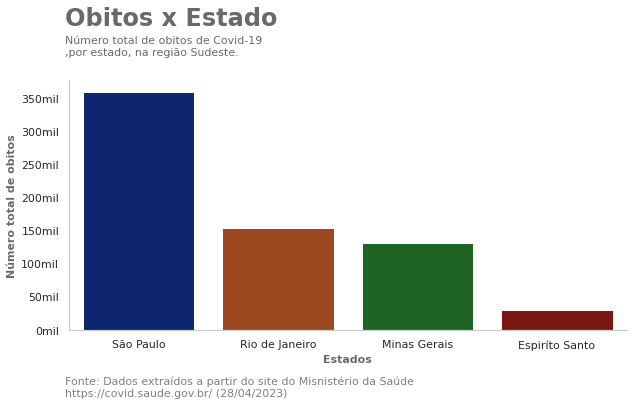

In [ ]:
# Plotando o gráfico Obito por estado
fig, ax = plt.subplots(figsize=(10,4.5), dpi=72)
sns.set_theme( style="whitegrid",palette = "dark")
sns.barplot(data = df_estados, x="Estados", y="Obitos_Acumulados")

#titulo
ax.text(-0.525,460000, "Obitos x Estado", fontsize=24, color="dimgray", fontweight="bold")

#subtítulo
ax.text(-0.525,415000,"Número total de obitos de Covid-19\n,por estado, na região Sudeste.", fontsize=11, color="dimgray")

#rodapé
ax.text(-0.525,-100000,"Fonte: Dados extraídos a partir do site do Misnistério da Saúde\nhttps://covid.saude.gov.br/ (28/04/2023)" ,fontsize=11, color= "gray")

#nomes dos eixos
plt.xlabel("Estados", fontsize=11, color="dimgray",fontweight="bold")
plt.ylabel("Número total de obitos", fontsize=11, color="dimgray", fontweight="bold")

#configuração ytick
plt.yticks(ticks= range(0,400000, 50000), labels=["0mil","50mil","100mil","150mil","200mil","250mil","300mil","350mil"])


plt.grid(visible=False)
sns.despine()
plt.show()

### Conclusão


Diante do exposto, conclui-se que a pandemia da Covid-19 foi um período bastante desafiador para toda humanidade.Fato esse evidenciado nas informações contidas nos gráficos sobre a quantidade de óbitos e casos no Brasil e no mundo.
Com o intuito de destacar essas e outras afirmações, a seguir segue os principais pontos que considero importantes após essa análise exploratória, são eles:

* Os 5 paises que tiveram mais casos registrados de Covid-19 no mundo foram: ``Estados Unidos, Índia, França, Alemanha e Brasil.``
* Os 5 paises que tiveram mais óbitos registrados de Covid-19 no mundo foram: ``Estados Unidos, Brasil, Índia, Rússia e México.``
* O primeiro caso registrado no Brasil foi no dia ``26/02/2020.``(Ver notícia: [site da UNA-SUS](https://www.unasus.gov.br/noticia/coronavirus-brasil-confirma-primeiro-caso-da-doenca))
* A primeira morte de Covid-19 no Brasil, segundo os dados analisados ocorreu no dia ``12/03/2020`` ( Ver notícia: [site CNN](https://www.cnnbrasil.com.br/saude/primeira-morte-por-covid-19-no-pais-ocorreu-em-12-de-marco-em-sp-diz-ministerio/)). 

* Passaram ``20 dias`` entre primeiro caso e a primeira morte de Covid-19 no Brasil.
* Foi percebido que no ano de ``2022`` houve ,no Brasil, um aumento considerado no número de casos em relação ao ano anterior, em contrapartida existiu menos óbitos.(Ver notícia: [site CNN Brasil](https://www.cnnbrasil.com.br/saude/covid-em-2022-queda-de-mortes-aumento-de-casos-autotestes-e-descobertas/)).Importante mencionar, que foi nesse ano que o Brasil avançou na vacinação e diminuiu as medidas restritivas, retomando aos poucos a "vida normal".
* O ano de ``2021`` foi considerado o mais letal da pandemia no Brasil. (Ver notícias: [site CNN](https://www.cnnbrasil.com.br/saude/brasil-encerra-2021-com-412-880-mortes-por-covid-19/), [g1.globo.com](https://g1.globo.com/jornal-nacional/noticia/2021/12/31/balanco-indica-que-2021-foi-o-ano-mais-letal-da-pandemia-no-pais.ghtml))
* A ``região Sudeste`` do Brasil aparece como destaque, tanto para a quantidade de casos,como para o número de óbitos. Interessante contextualizar que essa região é a mais populosa do país, com cerca 80 milhões de habitantes.
* O estado de ``São Paulo``, localizado na região Sudeste, é evidenciado em relação aos demais pelo fato de ter ``359.104 mil mortes`` e mais de ``6 milhões de casos`` de Covid-19 confirmados.

#### Atualização sobre a Covid-19
No dia 05 de maio de 2023 a Organização Mundial da Saúde (OMS), declarou em Genebra, na Suíça, o fim da Emergência de Saúde Pública de Importância Internacional (ESPII) referente à COVID-19.Todavia, não devemos baixar a guarda quando se trata dessa doença.Pois, sabemos o quanto essa crise pandêmica nos causou, foram deste de muitas mortes e sequelas relacionado a saúde até crises econômicas mundiais.

<center><img alt="Colaboratory logo" width="40%" src="https://img.freepik.com/fotos-gratis/ela-sempre-coloca-um-sorriso-antes-de-usar-mascara-protetora_637285-10807.jpg?w=1380&t=st=1683644319~exp=1683644919~hmac=52f4c0e1afb7c2741966980179394b7968cd2fc48432f38a30e0065fe5deb9f4"></center> 

Como disse Jabas Barbosa, diretor da Organização Pan-Americana da Saúde (OPAS), *“Não devemos baixar a guarda, precisamos continuar vacinando os grupos vulneráveis e fortalecendo a vigilância. Também é hora de nos concentrarmos em nos preparar melhor para futuras emergências e reconstruir melhor para um futuro mais saudável e sustentável”.*

### Referências

[Agencia Brasil](https://agenciabrasil.ebc.com.br/saude/noticia/2023-05/covid-19-fim-da-emergencia-nao-altera-status-de-pandemia)

[OPAS - Organização Pan-Americana de Saúde](https://www.paho.org/pt/noticias/5-5-2023-oms-declara-fim-da-emergencia-saude-publica-importancia-internacional-referente)

[Our Word in Data](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-01..latest&facet=none&country=USA~GBR~CAN~DEU~ITA~IND&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Color+by+test+positivity=false)

[Github](https://github.com/owid/covid-19-data/tree/master/public/data)
[](https://www.linkedin.com/pulse/brasil-é-o-país-que-mais-matou-na-pandemia-matheus-miranda/?originalSubdomain=pt)

[Linkedin](https://www.linkedin.com/pulse/brasil-é-o-país-que-mais-matou-na-pandemia-matheus-miranda/?originalSubdomain=pt)

[OPAS - Organização Pan-Americana de Saúde](https://www.paho.org/pt/covid19)

[OPAS - Organização Pan-Americana de Saúde](https://www.paho.org/pt/covid19/historico-da-pandemia-covid-19)